# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import joblib
import matplotlib.pyplot as plt
import warnings

# Mengabaikan FutureWarning dari sklearn
warnings.filterwarnings('ignore', category=FutureWarning)

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Cek nilai null
# Cek dan hapus kolom duplikat yang mungkin muncul saat load data
if 'PreviousTransactionDate.1' in df.columns:
    df = df.drop(columns=['PreviousTransactionDate.1'])

# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() untuk fitur numerik.
# Pastikan Anda mengimpor MinMaxScaler di Langkah 1

# [Kode identifikasi kolom numerik/kategorikal di sini, jika perlu]
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# ...

# Inisialisasi dan terapkan MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Simpan scaler untuk inverse transform (KRITERIA WAJIB INI YANG HILANG)
scaler_ = scaler
# --- PASTIKAN BARIS INI ADA DAN DIJALANKAN ---

# Pastikan kamu menggunakan function head setelah melalukan scaling.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

# Mengidentifikasi kolom ID, IP Address, dan Tanggal yang akan di drop.
# Pastikan semua kolom ID/Unik dihapus
id_cols_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address']
date_cols_to_drop = ['TransactionDate', 'PreviousTransactionDate']

# Drop kolom-kolom yang tidak diperlukan
df = df.drop(columns=id_cols_to_drop + date_cols_to_drop, errors='ignore')

# Kolom kategorikal yang tersisa (sebelum encoding)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Kolom numerik yang tersisa (sebelum scaling)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan Anda mengimpor LabelEncoder di Langkah 1

# Inisialisasi dictionary untuk menyimpan encoder (untuk inverse transform)
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le # Simpan encoder

# Pastikan kamu menggunakan function head setelah melalukan encoding.
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
4,0.006874,0,1,2,NaN,3,0.648276,0.0,0.492591


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (menggunakan dropna() untuk kesederhanaan sesuai instruksi)
df = df.dropna()
df = df.reset_index(drop=True)

# Verifikasi: tampilkan sisa nilai hilang (seharusnya 0)
df.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000
mean,0.154880,0.789669,21.417355,1.011983,0.430079,1.532645,0.377129,0.029752,0.335118
std,0.151731,0.436994,12.415909,0.831046,0.288086,1.152746,0.242653,0.146416,0.262221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042538,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.093194
50%,0.110926,1.000000,21.500000,1.000000,0.435484,2.000000,0.351724,0.000000,0.307258
75%,0.214307,1.000000,32.000000,2.000000,0.661290,3.000000,0.521552,0.000000,0.507024
max,1.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000


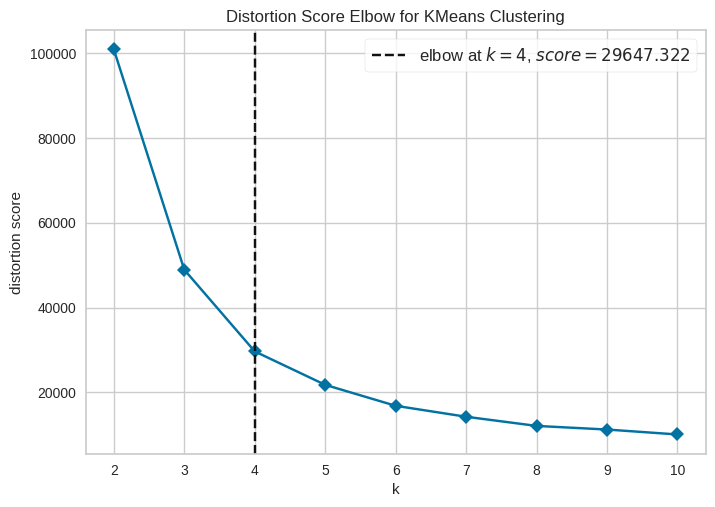

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Inisialisasi model KMeans
model = KMeans(random_state=42, n_init='auto')

# Inisialisasi KElbowVisualizer dengan rentang k (misalnya 1 hingga 10)
# 'distortion' untuk Sum of Squared Errors
visualizer = KElbowVisualizer(model, k=(2, 11), metric='distortion', timings=False)

# Melatih visualizer
X = df.values # Menggunakan nilai numpy dari DataFrame
visualizer.fit(X)

# Menampilkan visualisasi
visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering
# Tentukan jumlah cluster berdasarkan hasil Elbow Method (misalnya k=4)
optimal_k = 4 # Ganti dengan nilai optimal yang Anda temukan

# Inisialisasi model KMeans
model_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')

# Latih model
model_kmeans.fit(df)

# Tambahkan label cluster ke DataFrame
df['Cluster'] = model_kmeans.labels_

# Tampilkan jumlah sampel di setiap cluster
print(df['Cluster'].value_counts().sort_index())

Cluster
0    562
1    681
2    533
3    644
Name: count, dtype: int64


Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(model_kmeans, "model_clustering.h5")
print("Model clustering berhasil disimpan sebagai model_clustering.h5")

Model clustering berhasil disimpan sebagai model_clustering.h5


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
from sklearn.metrics import silhouette_score

# Pastikan Anda telah menjalankan bagian 4 dan df memiliki kolom 'Target'

# Use the 'Cluster' column which contains the clustering results
X = df.drop('Cluster', axis=1).values
# Use the 'Cluster' column as labels
labels = df['Cluster']

# Hitung Silhouette Score. Minimal 2 cluster diperlukan.
if len(labels.unique()) > 1:
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Tidak cukup cluster (k<2) untuk menghitung Silhouette Score.")

Silhouette Score: 0.5078


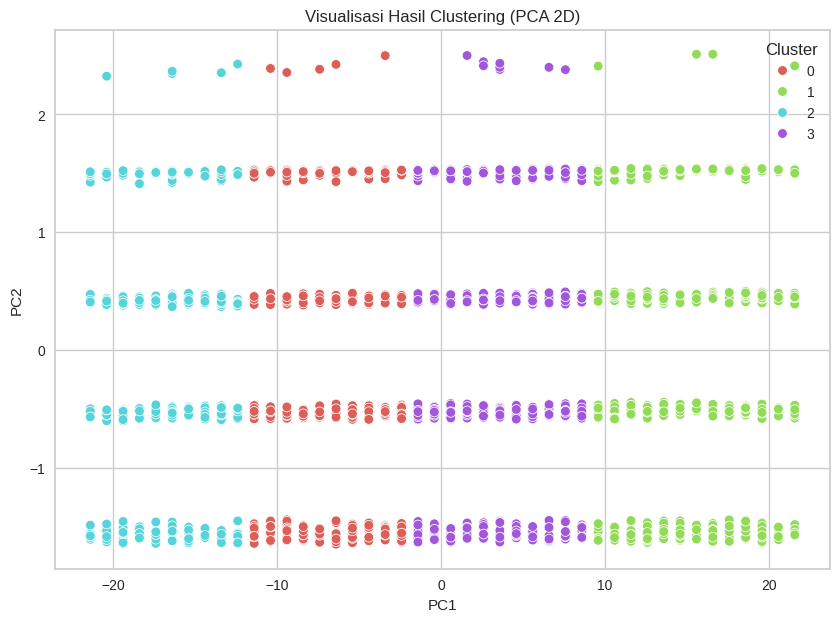

In [24]:
# Membuat visualisasi hasil clustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan df memiliki kolom 'Target' (Cluster labels)

# 1. Terapkan PCA untuk mereduce dimensi menjadi 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) # Gunakan X dari kode Silhouette

# 2. Buat DataFrame dari hasil PCA
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster'] # Tambahkan label cluster (gunakan 'Cluster' instead of 'Target')

# 3. Visualisasi
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, # Use 'Cluster' for hue
                palette=sns.color_palette("hls", df['Cluster'].nunique()),
                legend='full')
plt.title('Visualisasi Hasil Clustering (PCA 2D)')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.
from sklearn.decomposition import PCA

# Tentukan jumlah komponen (misalnya n_components=2)
# Gunakan data tanpa kolom Target/Cluster
X_no_cluster = df.drop('Cluster', axis=1).values

# Inisialisasi dan terapkan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_no_cluster)

# Menyimpan data PCA sebagai Dataframe
PCA_data_final = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Inisialisasi dan latih model Kmeans baru with the modified data using PCA.
# Use the same number of clusters (optimal_k)
model_kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
model_kmeans_pca.fit(PCA_data_final)

# Tampilkan status model PCA
print(f"PCA Model trained with {pca.n_components} components.")
print(f"KMeans Model on PCA data trained with {optimal_k} clusters.")

PCA Model trained with 2 components.
KMeans Model on PCA data trained with 4 clusters.


In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(model_kmeans_pca, "PCA_model_clustering.h5")
joblib.dump(model_kmeans_pca, "PCA_model_clustering.h5")
print("Model KMeans (setelah PCA) berhasil disimpan sebagai PCA_model_clustering.h5")

Model KMeans (setelah PCA) berhasil disimpan sebagai PCA_model_clustering.h5


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
cluster_analysis = df.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max'])
print(cluster_analysis)

        TransactionAmount                     CustomerAge            \
                     mean       min       max        mean  min  max   
Cluster                                                               
0                0.157594  0.000099  0.725580    0.436546  0.0  1.0   
1                0.158538  0.000599  1.000000    0.413931  0.0  1.0   
2                0.152371  0.000031  0.954092    0.442686  0.0  1.0   
3                0.150721  0.000000  0.918269    0.431076  0.0  1.0   

        TransactionDuration                LoginAttempts            \
                       mean  min       max          mean  min  max   
Cluster                                                              
0                  0.387894  0.0  0.996552      0.040480  0.0  1.0   
1                  0.367102  0.0  0.986207      0.021292  0.0  1.0   
2                  0.378909  0.0  1.000000      0.030019  0.0  1.0   
3                  0.376863  0.0  1.000000      0.029115  0.0  1.0   

        Acc

1. Cluster 0
Rata-rata (mean):
•	TransactionAmount: 0.1576
•	CustomerAge: 0.4366
•	TransactionDuration: 0.3879
•	LoginAttempts: 0.0405
•	AccountBalance: 0.3431
Analisis:
Cluster ini menunjukkan pengguna dengan aktivitas transaksi moderat, usia pelanggan relatif dewasa, dan saldo akun cukup tinggi. LoginAttempts yang rendah mengindikasikan pengguna ini stabil dan jarang gagal login, mungkin pelanggan tetap yang sudah familiar dengan sistem.

2. Cluster 1
Rata-rata (mean):
•	TransactionAmount: 0.1589
•	CustomerAge: 0.4139
•	TransactionDuration: 0.3671
•	LoginAttempts: 0.0211
•	AccountBalance: 0.3344
Analisis:
Cluster ini merepresentasikan pengguna dengan transaksi dan durasi sedikit lebih rendah, usia relatif lebih muda, serta login attempts paling sedikit. Ini bisa menandakan pengguna baru atau pengguna dengan kebiasaan digital tinggi (tech-savvy) yang cepat dan efisien bertransaksi.

3. Cluster 2
Rata-rata (mean):
•	TransactionAmount: 0.1524
•	CustomerAge: 0.4427
•	TransactionDuration: 0.3781
•	LoginAttempts: 0.0300
•	AccountBalance: 0.3378
Analisis:
Cluster ini memiliki nilai yang cukup seimbang di semua variabel, tanpa ekstrem yang mencolok. Mungkin merupakan kelompok pengguna rata-rata, tidak terlalu aktif tapi juga tidak pasif — segmen ini cenderung stabil dan loyal tanpa banyak variasi perilaku.

4. Cluster 3
Rata-rata (mean):
•	TransactionAmount: 0.1504
•	CustomerAge: 0.4318
•	TransactionDuration: 0.3769
•	LoginAttempts: 0.0291
•	AccountBalance: 0.3271
Analisis:
Cluster ini cenderung memiliki saldo dan aktivitas transaksi paling rendah dibanding lainnya. Dengan usia sedang dan login attempts rendah, kelompok ini bisa jadi pengguna pasif — mereka memiliki akun, tetapi jarang melakukan transaksi besar atau sering berinteraksi dengan sistem.



# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': 'Target'})
df.columns.tolist() # Tampilkan list kolom untuk verifikasi

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'Target']

In [29]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)
print("Data dengan kolom Target (hasil clustering) berhasil disimpan ke data_clustering.csv")

Data dengan kolom Target (hasil clustering) berhasil disimpan ke data_clustering.csv


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
df_inverse = df.copy()

# Daftar kolom numerik yang tersisa di DataFrame
# Asumsi kolom non-numerik (setelah encoding) adalah: 'TransactionType', 'Location', 'Channel', 'CustomerOccupation'
# Gunakan daftar kolom numerik dari proses scaling
numerical_cols_to_inverse = [
    'TransactionAmount', 'AccountBalance',
    'CustomerAge', 'TransactionDuration',
    'LoginAttempts'
]

# Lakukan inverse transform
df_inverse[numerical_cols_to_inverse] = scaler_.inverse_transform(df_inverse[numerical_cols_to_inverse])

# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Target
0,14.09,1,36,0,253.225806,0,1.979310,101.25,38.883575,1
1,376.24,1,15,0,243.870968,0,2.806897,101.25,74.919387,0
2,126.29,1,23,2,14.677419,3,1.634483,101.25,22.255516,3
3,184.50,1,33,2,47.419355,3,1.206897,101.25,53.290273,1
4,92.15,1,28,0,10.000000,3,3.234483,101.25,20.835746,3


In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Gunakan encoders yang disimpan dari langkah 3
categorical_cols_to_inverse = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

for col in categorical_cols_to_inverse:
    if col in df_inverse.columns and col in encoders:
        le = encoders[col]
        # Konversi ke integer karena LabelEncoder bekerja dengan integer
        df_inverse[col] = le.inverse_transform(df_inverse[col].astype(int))

# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Target
0,14.09,Debit,San Diego,ATM,253.225806,Doctor,1.979310,101.25,38.883575,1
1,376.24,Debit,Houston,ATM,243.870968,Doctor,2.806897,101.25,74.919387,0
2,126.29,Debit,Mesa,Online,14.677419,Student,1.634483,101.25,22.255516,3
3,184.50,Debit,Raleigh,Online,47.419355,Student,1.206897,101.25,53.290273,1
4,92.15,Debit,Oklahoma City,ATM,10.000000,Student,3.234483,101.25,20.835746,3


In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
numerical_cols_to_inverse = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']
categorical_cols_to_inverse = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Analisis Numerik (dengan nilai aslinya)
numerical_analysis_inverse = df_inverse.groupby('Target')[numerical_cols_to_inverse].agg(['mean', 'min', 'max'])
print("--- Analisis Numerik (Nilai Asli) ---")
print(numerical_analysis_inverse)

# Analisis Kategorikal (dengan nilai aslinya)
categorical_analysis_inverse = df_inverse.groupby('Target')[categorical_cols_to_inverse].agg(lambda x: x.mode()[0])
print("\n--- Analisis Kategorikal (Mode Nilai Asli) ---")
print(categorical_analysis_inverse)

--- Analisis Numerik (Nilai Asli) ---
       TransactionAmount                AccountBalance                        \
                    mean   min      max           mean        min        max   
Target                                                                         
0             302.659947  0.45  1392.54      39.273486  18.069724  79.853260   
1             304.470073  1.41  1919.11      38.731584  18.000000  80.000000   
2             292.637523  0.32  1831.02      38.915824  18.116859  79.822920   
3             289.470807  0.26  1762.28      38.277991  18.047969  78.741641   

       CustomerAge              TransactionDuration                 \
              mean   min    max                mean  min       max   
Target                                                               
0       136.598267  10.0  300.0            2.551577  1.0  4.986207   
1       130.040027  10.0  300.0            2.468409  1.0  4.944828   
2       138.378926  10.0  300.0            2.515637

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [34]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.